In [1]:
from mp1 import generate_dataset_regression
from mp1 import generate_test_set_regression
from mp1 import visualize_prediction
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout
from keras.layers import Conv2D, MaxPool2D, Flatten
from pandas import get_dummies

import matplotlib.pyplot as plt
import keras
import numpy as np
import tensorflow as tf

Using TensorFlow backend.


# Data Generation

In [2]:
def sort(t):
    t = np.reshape(t, (-1, 3, 2))
    order = np.argsort(t, axis=1)[:, :, 0]
    for idx, t_ in enumerate(t):
        t[idx] = t_[order[idx]]
    return np.reshape(t, (-1, 6))
def add_position(x_train):
    data_size = x_train.shape[0]
    x = np.linspace(0, 1, 100)
    y = np.linspace(0, 1, 100)
    y, x = np.meshgrid(x, y)
    pos = np.stack((x, y), axis=2)
    pos = np.repeat(np.expand_dims(pos, axis=0), data_size, axis=0)
    return np.concatenate((x_train, pos), axis=3)
    
[x_train, t_train] = generate_dataset_regression(1000, 20)
x_train = np.reshape(x_train, (-1, 100, 100, 1))
x_train = add_position(x_train)
t_train = sort(t_train)

[x_test, t_test] = generate_test_set_regression()
x_test = np.reshape(x_test, (-1, 100, 100, 1))
x_test = add_position(x_test)
t_test = sort(t_test)

# Regression with CNN

In [3]:
def loss(t, y):
    diff = (y - t)**2
    loss = tf.reduce_sum(diff[:, 0:2], axis=1)+tf.reduce_sum(diff[:, 2:4], axis=1)+tf.reduce_sum(diff[:, 4:], axis=1)
    loss = tf.reduce_mean(loss)
    return loss

cnn = Sequential()  
cnn.add(Conv2D(filters=16,  
               kernel_size=(3,3),  
               padding='same',  
               input_shape=x_train.shape[1:],
               activation='relu'))  
#cnn.add(Dropout(0.2))
cnn.add(MaxPool2D(pool_size=(2,2)))  
cnn.add(Conv2D(filters=32,  
               kernel_size=(3,3),  
               padding='same',  
               activation='relu'))  
#cnn.add(Dropout(0.2))
cnn.add(MaxPool2D(pool_size=(2,2)))  
cnn.add(Flatten())  
#cnn.add(Dropout(0.2))
cnn.add(Dense(128, activation='relu'))  
#cnn.add(Dropout(0.2))
cnn.add(Dense(6, activation='sigmoid'))  
adam = keras.optimizers.Adam(lr=5e-4, beta_1=0.9, beta_2=0.999, epsilon=1e-08, decay=0.0)
cnn.compile(loss=loss, optimizer=adam)
print('Training ------------')
cnn.fit(x_train, t_train, epochs=80, batch_size=50)

Training ------------
Epoch 1/80
1000/1000 [==============================] - 4s 4ms/step - loss: 0.3683
Epoch 2/80
1000/1000 [==============================] - 1s 1ms/step - loss: 0.2701
Epoch 3/80
1000/1000 [==============================] - 1s 1ms/step - loss: 0.2335
Epoch 4/80
1000/1000 [==============================] - 1s 1ms/step - loss: 0.2035
Epoch 5/80
1000/1000 [==============================] - 1s 1ms/step - loss: 0.1804
Epoch 6/80
1000/1000 [==============================] - 1s 1ms/step - loss: 0.1565
Epoch 7/80
1000/1000 [==============================] - 1s 1ms/step - loss: 0.1414
Epoch 8/80
1000/1000 [==============================] - 1s 1ms/step - loss: 0.1274
Epoch 9/80
1000/1000 [==============================] - 1s 1ms/step - loss: 0.1150
Epoch 10/80
1000/1000 [==============================] - 1s 1ms/step - loss: 0.1039
Epoch 11/80
1000/1000 [==============================] - 1s 1ms/step - loss: 0.0962
Epoch 12/80
1000/1000 [==============================] - 1s 1ms

# Test CNN

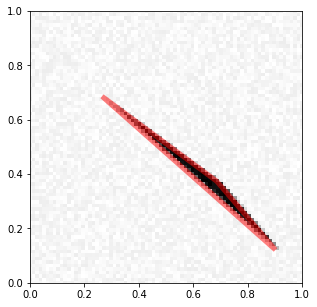

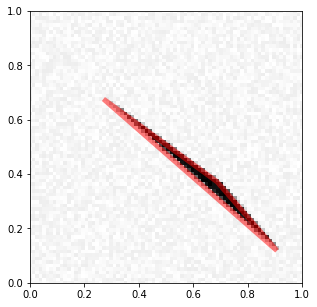

In [4]:
y_train = cnn.predict(x_train)

idx = 5
%matplotlib inline
visualize_prediction(x_train[idx, :, :, 0], t_train[idx])
visualize_prediction(x_train[idx, :, :, 0], y_train[idx])

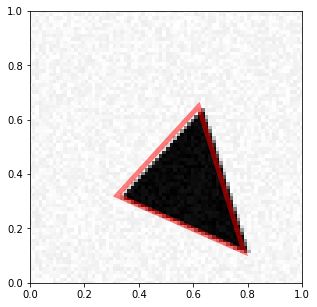

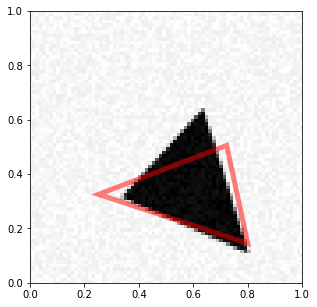

In [5]:
y_test = cnn.predict(x_test)

idx = 4
%matplotlib inline
visualize_prediction(x_test[idx, :, :, 0], t_test[idx])
visualize_prediction(x_test[idx, :, :, 0], y_test[idx])